# ABOUT THE DATASET

According to the WHO stroke is the 2nd leading cause od death globally.A stroke occurs when the blood supply to a part of the brain is interrupted or reduced,preventing the brain tiisue from getting oxygen and nutrients.This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like age,various disease etc.Each row in the data provides relevant information about the patient.

In [2]:
#data processing
import pandas as pd   #data processing
import numpy as np    #array processing
import os             #data importing

#data analysis
!pip install matplotlib
!pip install seaborn
import matplotlib.pyplot as plt  #for plots
import seaborn as sns           #for graphs

#Pre-Processing
!pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler    #for data scaling


#Models 
!pip install imbalanced-learn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix ,roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

#Neural Networks
import tensorflow as tf
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#Metrics
from sklearn.metrics import accuracy_score   #for classification report


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
Stroke=pd.read_csv("C:/Users/pallavi/capstone/data.csv")


In [3]:
Stroke.sample()

,age,sex,cpt,rbp,chlstrl,fbs,recgr,mhrac,exindang,oldpeak,slope,ca,thlsma,num
1058,43,0,1,122,154,0,0,99,0,1.4,3,2,7,0


In [5]:

Stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1500 non-null   int64  
 1   sex       1500 non-null   int64  
 2   cp        1500 non-null   int64  
 3   trestbps  1500 non-null   int64  
 4   chol      1500 non-null   int64  
 5   fbs       1500 non-null   int64  
 6   restecg   1500 non-null   int64  
 7   thalach   1500 non-null   int64  
 8   exang     1500 non-null   int64  
 9   oldpeak   1500 non-null   float64
 10  slope     1500 non-null   int64  
 11  ca        1500 non-null   int64  
 12  thal      1500 non-null   int64  
 13  num       1500 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 164.2 KB


In [5]:
null_summary = Stroke.isnull().sum()
print(null_summary)


age         0
sex         0
cpt         0
rbp         0
chlstrl     0
fbs         0
recgr       0
mhrac       0
exindang    0
oldpeak     0
slope       0
ca          0
thlsma      0
num         0
dtype: int64


# RANDOM FOREST

[[221   0]
 [  0  19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       1.00      1.00      1.00        19

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Mean cross-validation score: 0.9986666666666666


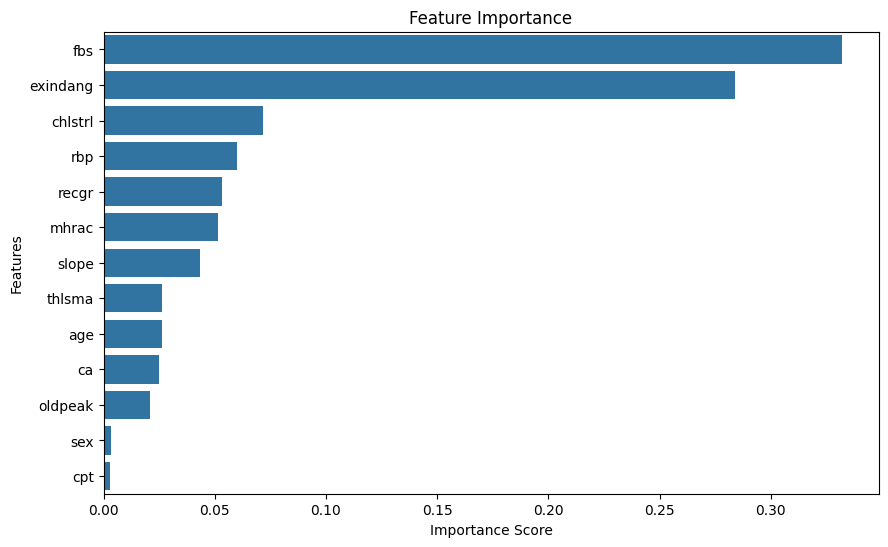

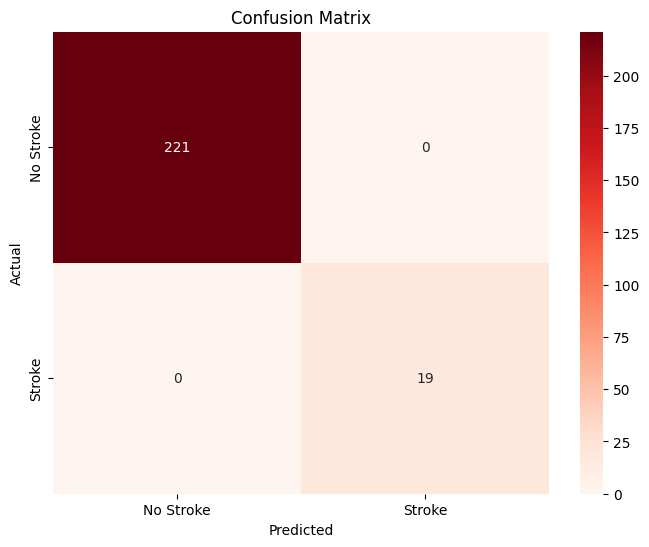

In [14]:

from sklearn.preprocessing import StandardScaler 
X = Stroke.drop('num', axis=1)
y = Stroke['num']

# Randomize
ran = np.random.choice(Stroke.index, size=int(0.8 * len(Stroke)), replace=False)

# Split the data
X_randomized = X.loc[ran]
y_randomized = y.loc[ran]

X_train, X_test, y_train, y_test = train_test_split(X_randomized, y_randomized, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score:", scores.mean())

# Feature Importance
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['No Stroke', 'Stroke'], 
            yticklabels=['No Stroke', 'Stroke']) 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# LOGISTIC REGRESSION

[[275   1]
 [  0  24]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       276
           1       0.96      1.00      0.98        24

    accuracy                           1.00       300
   macro avg       0.98      1.00      0.99       300
weighted avg       1.00      1.00      1.00       300

Mean cross-validation score: 0.9286666666666668


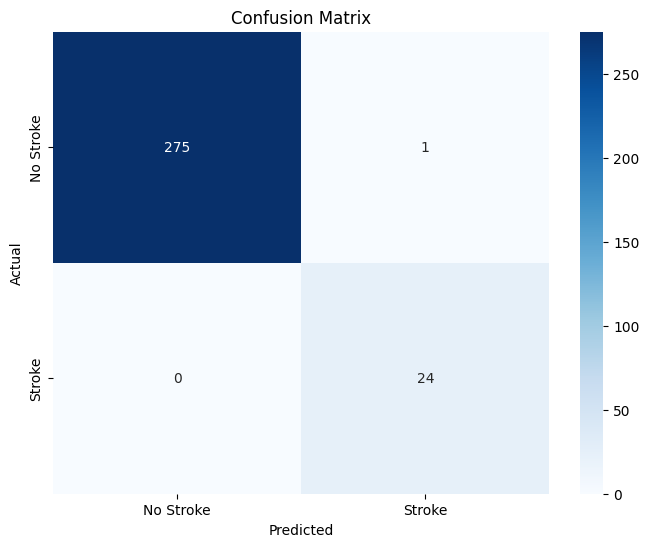

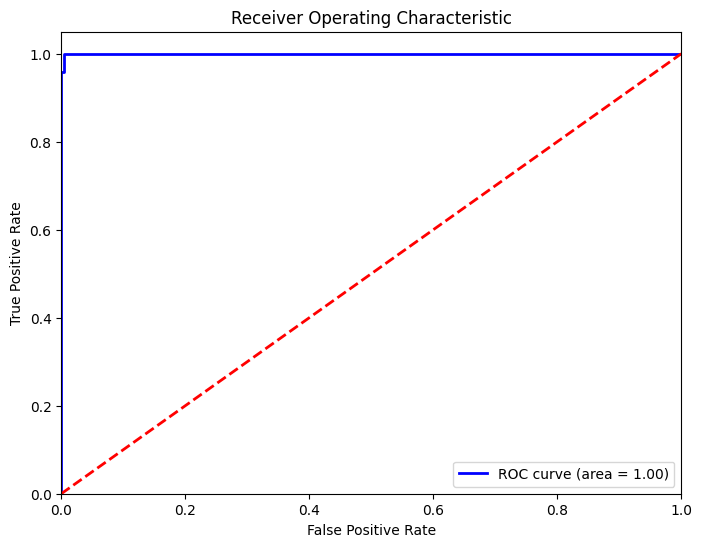

In [21]:
#LOGISTIC REGRESSION

# for preparing the data
X = Stroke.drop('num', axis=1)  # Features
y = Stroke['num']                # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Logistic Regression model
model = LogisticRegression(max_iter=2000)  # Increase max_iter if convergence warning occurs
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score:", scores.mean())


conf_matrix = confusion_matrix(y_test, y_pred)

# Ploting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Stroke', 'Stroke'], 
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

#  For Plotting the  ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# SVM


[[276   0]
 [ 12  12]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       276
           1       1.00      0.50      0.67        24

    accuracy                           0.96       300
   macro avg       0.98      0.75      0.82       300
weighted avg       0.96      0.96      0.95       300

Mean cross-validation score: 0.946


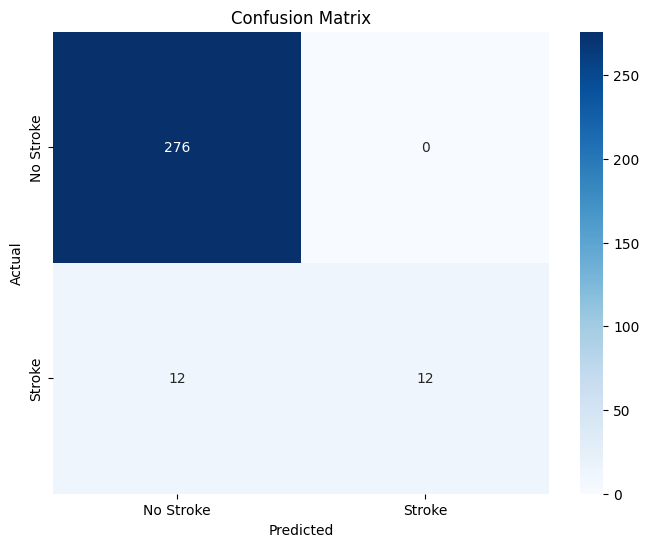

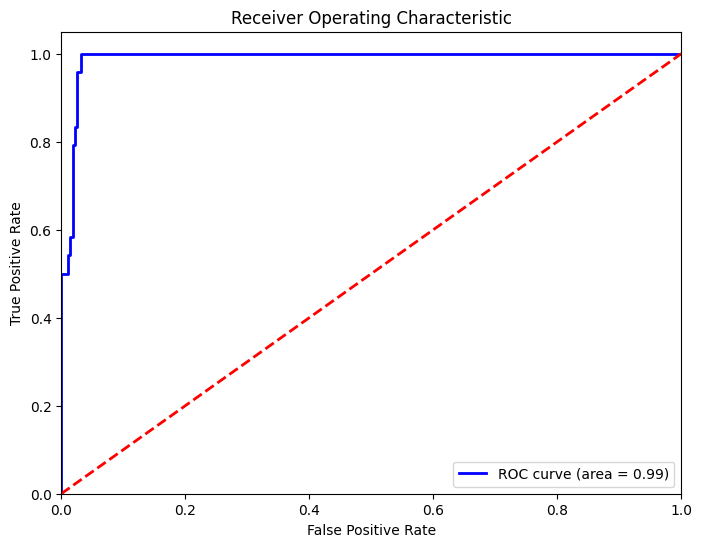

In [15]:
X = Stroke.drop('num', axis=1)  # Features
y = Stroke['num']                # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the SVM mode
model = svm.SVC(probability=True)  # Set probability=True for ROC curve
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score:", scores.mean())

conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Stroke', 'Stroke'], 
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# For Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [10]:
X = Stroke.drop('num', axis=1)  
y = Stroke['num']                

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Model ###

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

rf_report = classification_report(y_test, rf_y_pred, output_dict=True)

### Logistic Regression Model ###

lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train, y_train)

lr_y_pred = lr_model.predict(X_test)

lr_report = classification_report(y_test, lr_y_pred, output_dict=True)


# SVM model
svm_model = SVC(probability=True)  # Set probability=True to get probabilities for ROC curve, if needed
svm_model.fit(X_train, y_train)

# predictions
svm_y_pred = svm_model.predict(X_test)

# classification report
svm_report = classification_report(y_test, svm_y_pred, output_dict=True)


combined_report = pd.DataFrame({
    'Random Forest': rf_report['1'],  # Assuming '1' is the positive class
    'Logistic Regression': lr_report['1'],
    'SVM':svm_report['1']
}).T

#  combined report
print(combined_report)

                     precision  recall  f1-score  support
Random Forest             1.00     1.0  1.000000     24.0
Logistic Regression       0.96     1.0  0.979592     24.0
SVM                       1.00     0.5  0.666667     24.0
